<a href="https://colab.research.google.com/github/ayoolafelix/DSN-BootCamp-Qualificaton/blob/master/DSN_Bootcamp_Qualification_2020_Pycaret_Fold_%3D_15_Improving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [3]:
#!pip install pycaret
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

# Set all options
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
test = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/Test.csv')
train = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/Train.csv')
sample = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/SampleSubmission.csv')

In [5]:
train.set_index('Applicant_ID', inplace = True)
test.set_index('Applicant_ID', inplace = True)

In [6]:
print('Train dataset has {} entries and {} features'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} entries and {} features'.format(test.shape[0], test.shape[1]))
print("We are predicting '{}'".format(train.columns[-1]))

Train dataset has 56000 entries and 51 features
Test dataset has 24000 entries and 50 features
We are predicting 'default_status'


In [7]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,"10,689,720.0000","252,072.0000","4,272,776.0000","11,333,126.0000","4,397,256.0000","2,301,324.0000","7,875,694.0000",96375139,"112,181,765.0000",1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,nan,nan,134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000",nan,"1,052.0000",8.0000,2.0000,nan,12.0000,12.0000,4.0000,0.0000,nan,nan,0.3929,2.0200,0.7116,0.0000,0.0000,charge,nan,1.1295,0.0443,no
Apcnt_1000004,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,"898,979.0000","497,531.0000","9,073,814.0000","2,533,168.0000","244,292.0000","3,982,971.0000","2,141,445.0000",28141427,"45,169,902.0000",1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400","14,584.2900",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000",nan,"2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,nan,nan,0.3143,8.0800,0.1836,nan,0.0000,charge,349.8057,1.6205,0.3224,no
Apcnt_1000008,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,"956,940.0000",nan,"192,944.0000","1,079,864.0000",nan,nan,0.0000,16576457,"22,452,691.0000",nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,"1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000",nan,"14,508.0000",70.0000,0.6666,0.0000,nan,12.0000,0.0000,6.0000,0.0000,149.6805,nan,0.1630,18.1800,0.7911,0.0000,0.0000,charge,nan,1.5134,0.0116,yes
Apcnt_1000012,"3,372.0000",0.1701,0.5050,0.0000,0.0000,"192,166.0000","3,044,703.0000","385,499.0000","3,986,472.0000","3,621,979.0000",nan,"771,776.0000","1,186,839.0000",48187375,"136,297,820.0000",0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",0.0000,85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000",nan,nan,522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,nan,nan,0.4889,2.0200,0.6852,nan,0.0000,charge,89.9401,0.6645,0.0827,no
Apcnt_1000016,"3,370.0000",0.7727,1.1010,0.0000,0.0000,"1,556.0000","214,728.0000","214,728.0000","1,284,089.0000","361,770.0000","396,391.0000","818,456.0000","511,535.0000",28141427,"15,292,757.0000",0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900","10,326.4500",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000","5,202.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,150.0135,nan,0.2750,12.1200,0.4382,0.0000,0.0000,charge,97.8875,1.4279,0.0456,no


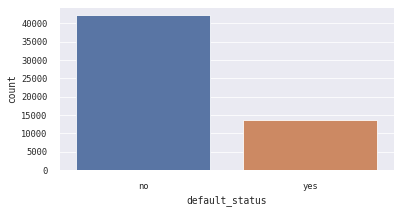

In [8]:
plt.figure(figsize=(6,3))
sns.countplot(x= train.columns[-1] ,data=train)
plt.show()

In [9]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


In [10]:
quality_report(train)

,Total,Percent,Nunique,Dtype
form_field40,43729,78.0875,9848,float64
form_field31,39408,70.3714,394,float64
form_field41,38229,68.2661,14375,float64
form_field11,31421,56.1089,9508,float64
form_field45,31317,55.9232,6,float64
form_field23,28123,50.2196,16619,float64
form_field30,25509,45.5518,274,float64
form_field35,23148,41.3357,11,float64
form_field15,22475,40.1339,23783,float64
form_field48,20889,37.3018,32115,float64


In [11]:
test['default_status'] = 'test' #for easy separation

# Combine train and test to avoid repetition
data = pd.concat([train, test])

In [12]:
data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,"10,689,720.0000","252,072.0000","4,272,776.0000","11,333,126.0000","4,397,256.0000","2,301,324.0000","7,875,694.0000",96375139,"112,181,765.0000",1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,nan,nan,134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000",nan,"1,052.0000",8.0000,2.0000,nan,12.0000,12.0000,4.0000,0.0000,nan,nan,0.3929,2.0200,0.7116,0.0000,0.0000,charge,nan,1.1295,0.0443,no
Apcnt_1000004,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,"898,979.0000","497,531.0000","9,073,814.0000","2,533,168.0000","244,292.0000","3,982,971.0000","2,141,445.0000",28141427,"45,169,902.0000",1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400","14,584.2900",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000",nan,"2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,nan,nan,0.3143,8.0800,0.1836,nan,0.0000,charge,349.8057,1.6205,0.3224,no
Apcnt_1000008,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,"956,940.0000",nan,"192,944.0000","1,079,864.0000",nan,nan,0.0000,16576457,"22,452,691.0000",nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,"1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000",nan,"14,508.0000",70.0000,0.6666,0.0000,nan,12.0000,0.0000,6.0000,0.0000,149.6805,nan,0.1630,18.1800,0.7911,0.0000,0.0000,charge,nan,1.5134,0.0116,yes
Apcnt_1000012,"3,372.0000",0.1701,0.5050,0.0000,0.0000,"192,166.0000","3,044,703.0000","385,499.0000","3,986,472.0000","3,621,979.0000",nan,"771,776.0000","1,186,839.0000",48187375,"136,297,820.0000",0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",0.0000,85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000",nan,nan,522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,nan,nan,0.4889,2.0200,0.6852,nan,0.0000,charge,89.9401,0.6645,0.0827,no
Apcnt_1000016,"3,370.0000",0.7727,1.1010,0.0000,0.0000,"1,556.0000","214,728.0000","214,728.0000","1,284,089.0000","361,770.0000","396,391.0000","818,456.0000","511,535.0000",28141427,"15,292,757.0000",0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900","10,326.4500",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000","5,202.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,150.0135,nan,0.2750,12.1200,0.4382,0.0000,0.0000,charge,97.8875,1.4279,0.0456,no


In [13]:
print('Combined dataset has {} entries and {} features'.format(data.shape[0], data.shape[1]))

Combined dataset has 80000 entries and 51 features


In [14]:
missing_col = data.columns[data.isna().any()]
missing_col

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [15]:
for col in missing_col:
    
    data[col].fillna(data[col].mean(), inplace = True)

In [16]:
missing_col = data.columns[data.isna().any()]
missing_col

Index([], dtype='object')

In [17]:
quality_report(data)

,Total,Percent,Nunique,Dtype
default_status,0,0.0000,3,object
form_field13,0,0.0000,27226,float64
form_field23,0,0.0000,22455,float64
form_field22,0,0.0000,32337,float64
form_field21,0,0.0000,11797,float64
form_field20,0,0.0000,29,float64
form_field19,0,0.0000,27,float64
form_field18,0,0.0000,17,float64
form_field17,0,0.0000,16,float64
form_field16,0,0.0000,13,float64


In [18]:
train = data[:56000]
test = data[56000:]

In [19]:
exp_clf = setup(train, target = 'default_status', train_size = 0.7, normalize = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,7289
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(56000, 51)"
4,Missing Values,False
5,Numeric Features,49
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8081,0.8361,0.4408,0.6632,0.5295,0.4151,0.4288,30.7099
1,Gradient Boosting Classifier,0.8068,0.8338,0.4304,0.6628,0.5217,0.4074,0.4225,29.1420
2,Light Gradient Boosting Machine,0.8078,0.8338,0.4455,0.6596,0.5317,0.4164,0.4292,1.7987
3,Extreme Gradient Boosting,0.8062,0.8327,0.4204,0.6658,0.5151,0.4017,0.4184,5.1670
4,Extra Trees Classifier,0.8055,0.8277,0.4121,0.6670,0.5092,0.3963,0.4143,4.6816
5,Logistic Regression,0.8013,0.8267,0.4045,0.6529,0.4992,0.3837,0.4010,0.8137
6,Ada Boost Classifier,0.8008,0.8267,0.4328,0.6378,0.5156,0.3959,0.4078,5.8968
7,Linear Discriminant Analysis,0.8002,0.8234,0.4098,0.6455,0.5011,0.3839,0.3996,0.3450
8,Random Forest Classifier,0.7890,0.7894,0.3589,0.6196,0.4543,0.3349,0.3542,1.1367
9,Naive Bayes,0.6805,0.7887,0.8194,0.4218,0.5568,0.3450,0.3917,0.0310


In [21]:
base_model = create_model('catboost', fold = 15, cross_validation = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8194,0.8548,0.4594,0.7000,0.5547,0.4475,0.4631
1,0.8240,0.8361,0.4781,0.7083,0.5709,0.4654,0.4796
2,0.7992,0.8352,0.4266,0.6334,0.5098,0.3895,0.4015
3,0.8114,0.8340,0.4500,0.6713,0.5388,0.4260,0.4395
4,0.8109,0.8366,0.4562,0.6667,0.5417,0.4279,0.4401
5,0.8041,0.8339,0.4516,0.6422,0.5303,0.4112,0.4214
6,0.8090,0.8375,0.4734,0.6516,0.5484,0.4312,0.4400
7,0.7991,0.8233,0.4297,0.6322,0.5116,0.3909,0.4024
8,0.8086,0.8405,0.4422,0.6643,0.5310,0.4168,0.4304
9,0.8175,0.8447,0.4469,0.6993,0.5453,0.4379,0.4551


In [22]:
tuned_model = tune_model(base_model, fold = 15, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8206,0.8562,0.4469,0.7132,0.5495,0.4447,0.4637
1,0.8248,0.8367,0.4641,0.7209,0.5646,0.4613,0.4789
2,0.7972,0.8400,0.4062,0.6341,0.4952,0.3759,0.3905
3,0.8091,0.8351,0.4234,0.6758,0.5207,0.4092,0.4267
4,0.8098,0.8331,0.4344,0.6731,0.5280,0.4158,0.4314
5,0.8056,0.8301,0.4438,0.6514,0.5279,0.4110,0.4230
6,0.8102,0.8355,0.4547,0.6644,0.5399,0.4256,0.4377
7,0.8044,0.8239,0.4312,0.6525,0.5193,0.4029,0.4165
8,0.8113,0.8456,0.4391,0.6771,0.5327,0.4212,0.4367
9,0.8190,0.8465,0.4469,0.7062,0.5474,0.4413,0.4594


In [23]:
predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8110,0.8408,0.4352,0.6779,0.5301,0.4188,0.4349


In [24]:
finalize_model(tuned_model)

In [25]:
test.drop("default_status", axis = 1, inplace = True)

In [26]:
predictions = predict_model(tuned_model, data=test)
predictions.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,Label,Score
Apcnt_1000032,"3,236.0000",0.3488,10.2006,0.0000,0.0000,"418,564.0000","418,564.0000","418,564.0000","540,710.0000",0.0000,"1,649,749.0000","5,446.0000",0.0000,"48,187,375.0000","114,686,147.0000",0.0000,0.0000,0.0000,0.0000,0.0000,86.6851,"6,635.7848","6,458.8947",104.9728,"1,086.0000","6,204.0000","2,676.0000",60.0000,"14,691.0000","9,794.0000","10,880.6790",238.0000,1.8334,0.0000,0.1981,22.0000,2.0000,14.0000,0.0000,147.7462,108.1451,0.8250,1.0100,0.8000,0.0707,0.0000,charge,"304,133.0828",0.0000,0.0112,no,nan
Apcnt_1000048,"3,284.0000",1.2736,2.9606,9.0198,0.0000,0.0000,"9,858,816.0000","49,014.0000","1,510,098.0000","18,308,285.0000","622,789.0000","1,025,793.0000","1,396,510.0000","34,694,910.0000","87,479,487.0000",1.0000,1.0000,1.0000,2.0000,2.0000,142.5600,"6,635.7848","6,458.8947",570.5850,"3,082.5000","10,221.0000","6,814.0000",60.0000,"11,955.0000","3,528.0000","10,880.6790","1,216.0000",19.5000,3.0000,0.1981,30.0000,18.0000,14.0000,2.0000,147.7462,18.8415,0.5077,4.0400,0.6232,1.0000,0.0000,lending,"304,133.0828",0.5050,0.0435,no,nan
Apcnt_1000052,"3,491.9422",0.2751,0.0600,0.0000,0.0000,"625,007.2229","6,844,769.1317","2,634,964.1109","13,263,902.6090",0.0000,"118,256.0000","2,771,393.5957","6,002,145.4677","21,973,443.0000","114,397,177.9446",0.2316,0.2663,0.2720,0.0000,0.0000,86.6851,"6,635.7848","6,458.8947",104.9728,"2,625.0980","10,107.3655","6,193.1603",852.0000,"4,836.0000","5,223.7605","10,880.6790",940.8618,7.8334,0.0000,0.1981,2.0000,8.5027,0.0000,0.0908,147.7462,108.1451,0.3687,0.0000,0.5642,0.0707,0.0961,charge,"304,133.0828",0.0000,"622,857.9577",no,nan
Apcnt_1000076,"3,232.0000",0.2851,2.8032,0.0000,0.0000,0.0000,"473,802.0000","473,802.0000","1,724,437.0000","493,641.0000","1,391,064.0000","1,176,725.0000","1,220,293.0000","16,576,457.0000","114,397,177.9446",2.0000,2.0000,2.0000,3.0000,3.0000,109.0050,"13,050.0000","6,458.8947",109.0050,"1,414.5000","4,197.0000","2,798.0000",60.0000,"14,964.0000","5,223.7605","10,880.6790",248.0000,9.0000,1.0000,1.0000,36.0000,0.0000,26.0000,0.0000,147.7462,108.1451,0.9167,2.0200,0.4642,0.0707,0.0961,charge,90.1637,0.7888,0.1040,yes,nan
Apcnt_1000080,"3,466.0000",2.0955,0.8318,2.5182,0.0000,"19,839.0000","1,150,662.0000","1,150,662.0000","7,860,523.0000","5,752,921.0000","271,133.0000","613,064.0000","4,779,643.0000","48,187,375.0000","72,049,802.0000",0.0000,0.0000,0.0000,3.0000,3.0000,139.0650,469.2900,469.2900,15.1800,"2,724.0000","9,855.0000","6,570.0000",182.0000,"11,679.0000","5,900.0000","10,880.6790","2,388.0000",16.6666,1.0000,0.0000,24.0000,28.0000,20.0000,0.0000,147.7462,108.1451,0.2340,23.2300,0.7267,0.0000,0.0000,lending,"1,303.5871",1.6377,0.1631,no,nan


In [27]:
predictions.shape

(48000, 52)

In [28]:
sample['default_status'] = predictions['Score']
sample.to_csv('submission.csv',index=False)
sample.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.4062
1,Apcnt_1000048,0.3978
2,Apcnt_1000052,0.3353
3,Apcnt_1000076,0.7516
4,Apcnt_1000080,0.1535
